# Task 1: Cardiovascular Disease Prediction Model Creation


### Objective:
To create a predictive model for identifying the risk of cardiovascular disease using the provided dataset. This task will involve Exploratory Data Analysis (EDA) followed by model development.


### Data Description
1. id: Unique identifier for each individual
2. age: Age of the individual in years
3. gender: Gender of the individual (1 - female, 2 - male)
4. height: Height of the individual in cm
5. weight: Weight of the individual in kg
6. ap_hi: Systolic blood pressure
7. ap_lo: Diastolic blood pressure
8. cholesterol: Cholesterol level (1 - normal, 2 - above normal, 3 - well above normal)
9. gluc: Glucose level (1 - normal, 2 - above normal, 3 - well above normal)
10. smoke: Smoking status (0 - non-smoker, 1 - smoker)
11. alco: Alcohol intake status (0 - non-drinker, 1 - drinker)
12. active: Physical activity level (0 - inactive, 1 - active)
13. cardio: Target variable indicating the presence or absence of cardiovascular disease (0 - no disease, 1 - disease)


### Import packages

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
file_path = '/home/supriya/Desktop/FDV/cvd_prediction/cardio.csv'

In [4]:
data = pd.read_csv(file_path, sep=';')

### EDA

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
2,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
3,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
4,8,21914,1,151,67.0,120,80,2,2,0,0,0,0


In [6]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000
mean,49974.561153,19468.880995,1.349558,164.358915,74.204942,128.817092,96.630698,1.366830,1.226438,0.088118,0.053759,0.803720,0.499693
std,28850.066516,2467.204211,0.476834,8.209839,14.395578,154.014714,188.476564,0.680207,0.572242,0.283469,0.225544,0.397185,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25009.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50004.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74890.000000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69997 entries, 0 to 69996
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69997 non-null  int64  
 1   age          69997 non-null  int64  
 2   gender       69997 non-null  int64  
 3   height       69997 non-null  int64  
 4   weight       69997 non-null  float64
 5   ap_hi        69997 non-null  int64  
 6   ap_lo        69997 non-null  int64  
 7   cholesterol  69997 non-null  int64  
 8   gluc         69997 non-null  int64  
 9   smoke        69997 non-null  int64  
 10  alco         69997 non-null  int64  
 11  active       69997 non-null  int64  
 12  cardio       69997 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### Cleaning systolic and diastolic pressure

In [9]:
def clean_pressure(item):
    if item<0:
        return abs(item)
    else:
        return item
    
data['ap_hi']= data['ap_hi'].apply(clean_pressure)
data['ap_lo']= data['ap_lo'].apply(clean_pressure)



#### Min-Max scaling on Age

(array([4.0000e+00, 0.0000e+00, 2.4420e+03, 5.3790e+03, 6.2500e+03,
        1.0499e+04, 1.2911e+04, 1.1696e+04, 1.1405e+04, 9.4110e+03]),
 array([10798. , 12089.5, 13381. , 14672.5, 15964. , 17255.5, 18547. ,
        19838.5, 21130. , 22421.5, 23713. ]),
 <BarContainer object of 10 artists>)

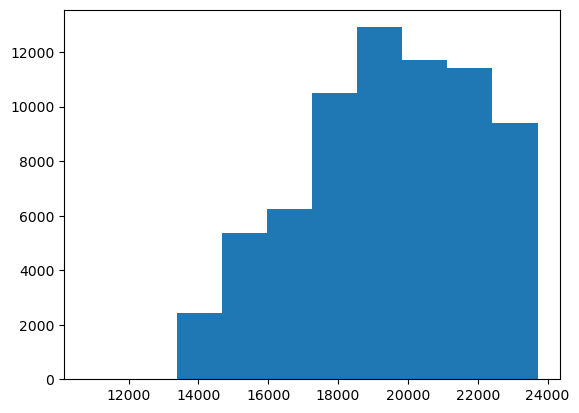

In [10]:
plt.hist(x = data['age'])

##### Using Z-score normalization

(array([4.0000e+00, 0.0000e+00, 2.4420e+03, 5.3790e+03, 6.2500e+03,
        1.0501e+04, 1.2909e+04, 1.1713e+04, 1.1388e+04, 9.4110e+03]),
 array([-3.51448125, -2.9910105 , -2.46753976, -1.94406901, -1.42059827,
        -0.89712752, -0.37365678,  0.14981397,  0.67328471,  1.19675545,
         1.7202262 ]),
 <BarContainer object of 10 artists>)

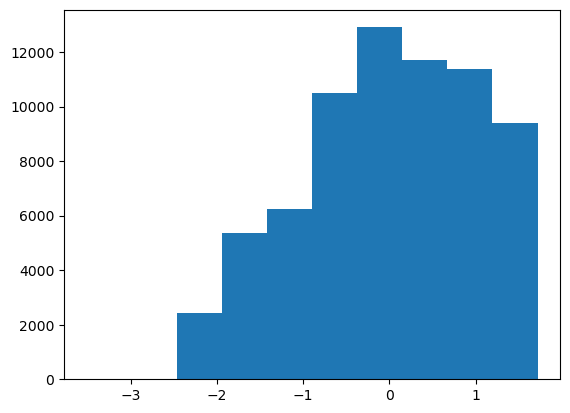

In [11]:

age_mean = np.mean(data['age'])
age_std_dev = np.std(data['age'])

data['age'] = (data['age'] - age_mean) / age_std_dev

plt.hist(x = data['age'])


#### Numerical and Categorical Columns

In [12]:
numerical_cols = ['id', 'age', 'height', 'cholesterol', 'ap_lo', 'ap_hi']
categorical_cols = ['cardio', 'active', 'alco', 'smoke', 'gluc', 'cholesterol', 'gender']

#### Visualization of Categorical

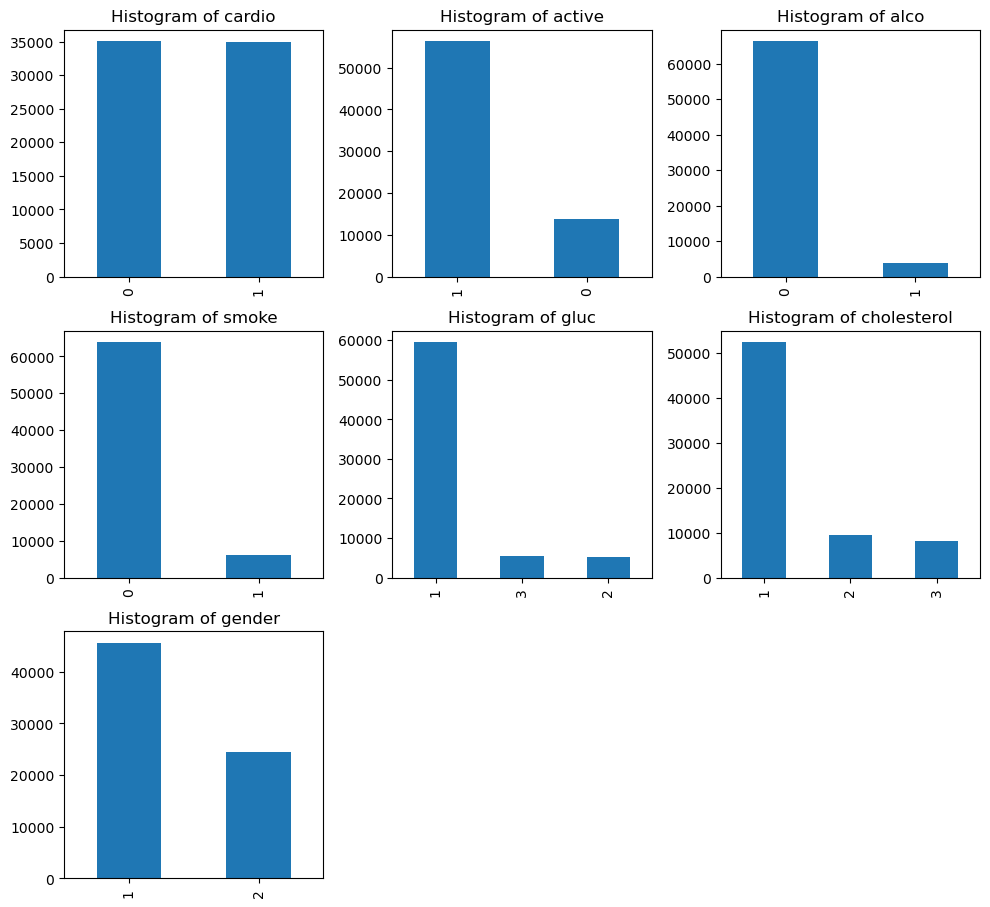

In [13]:
columns_per_row = 3

num_cols = 7
num_rows = 4

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(10, 3 * num_rows))
for i, col in enumerate(categorical_cols):
    ax = axes[i // columns_per_row, i % columns_per_row]
    data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(num_cols, num_rows * columns_per_row):
    fig.delaxes(axes.flatten()[i])

    
plt.tight_layout()
plt.show()

#### Visualization of Numerical variables

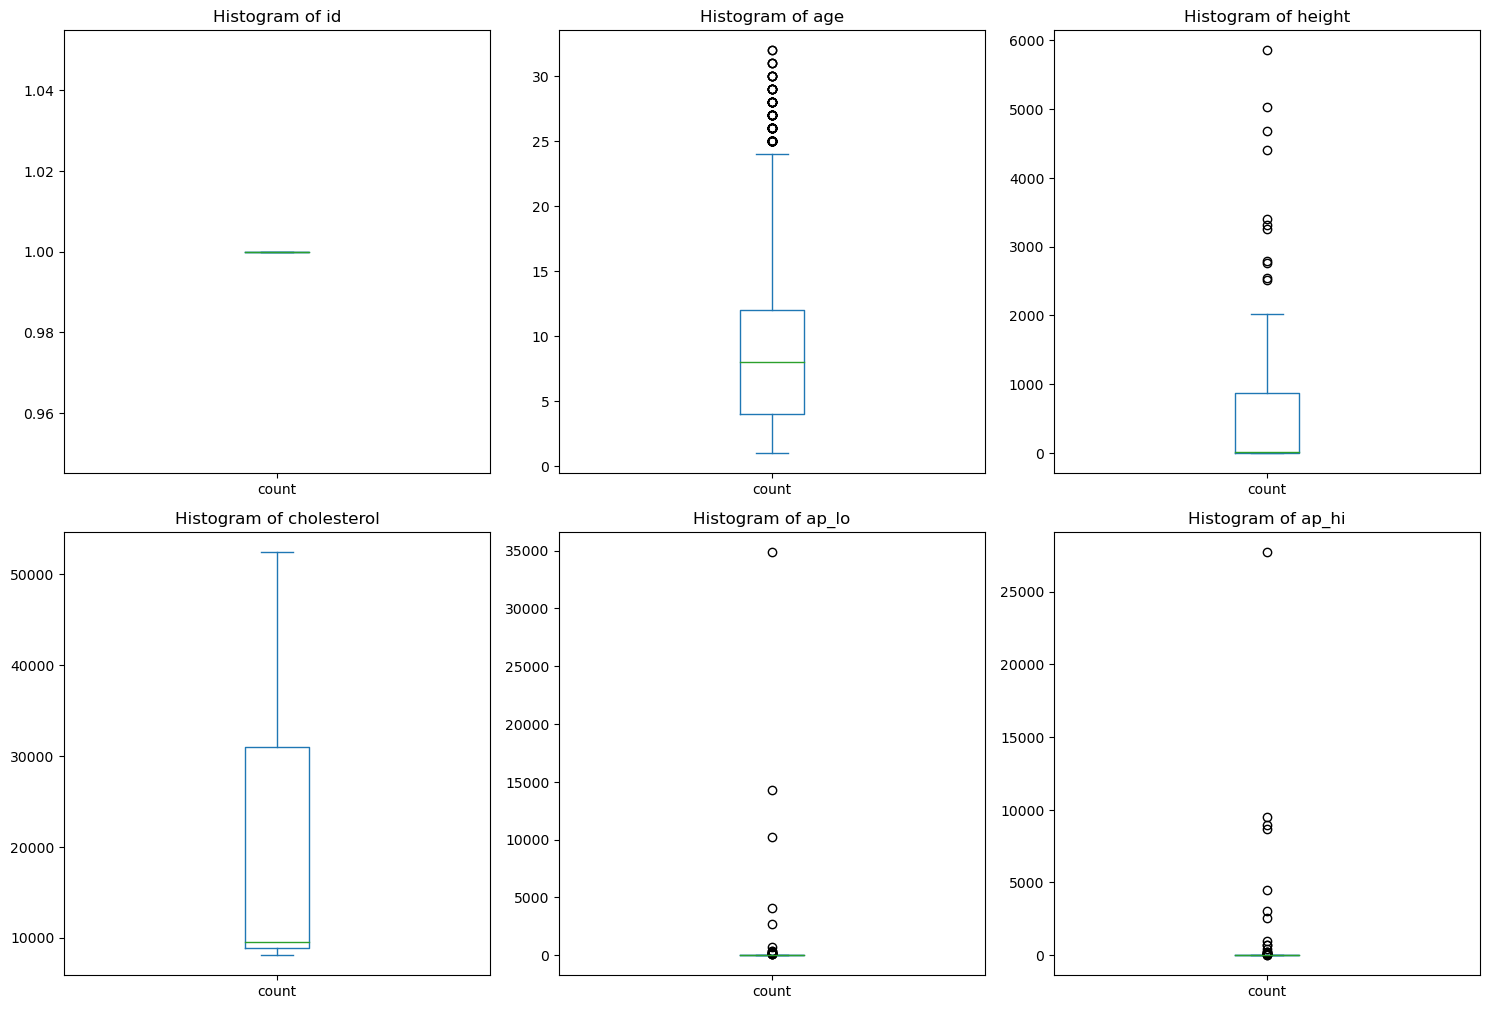

In [14]:
columns_per_row = 3

num_cols = 6
num_rows = 4

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_cols):
    ax = axes[i // columns_per_row, i % columns_per_row]
    data[col].value_counts().plot(kind='box', ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(num_cols, num_rows * columns_per_row):
    fig.delaxes(axes.flatten()[i])

    
plt.tight_layout()
plt.show()

#### Handling Outliers

In [15]:
# for ap_hi
Q1 = np.percentile(data['ap_hi'], 25)
Q3 = np.percentile(data['ap_hi'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['ap_hi'] = np.where((data['ap_hi'] < lower_bound) | (data['ap_hi'] > upper_bound), np.median(data['ap_hi']), data['ap_hi'])





In [16]:
# for ap_lo
Q1 = np.percentile(data['ap_lo'], 25)
Q3 = np.percentile(data['ap_lo'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['ap_lo'] = np.where((data['ap_lo'] < lower_bound) | (data['ap_lo'] > upper_bound), np.median(data['ap_lo']), data['ap_lo'])





{'whiskers': [<matplotlib.lines.Line2D at 0x74a167f4f790>,
 'caps': [<matplotlib.lines.Line2D at 0x74a167f5cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x74a167f4ee50>],
 'medians': [<matplotlib.lines.Line2D at 0x74a167f5db10>],
 'fliers': [<matplotlib.lines.Line2D at 0x74a167f5da90>],
 'means': []}

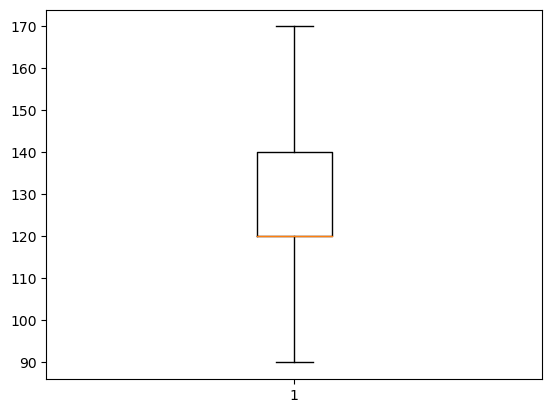

In [17]:
plt.boxplot(x=data['ap_hi'])


{'whiskers': [<matplotlib.lines.Line2D at 0x74a167fc7010>,
 'caps': [<matplotlib.lines.Line2D at 0x74a167fd48d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x74a167fc6310>],
 'medians': [<matplotlib.lines.Line2D at 0x74a167fd5d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x74a167fd5d50>],
 'means': []}

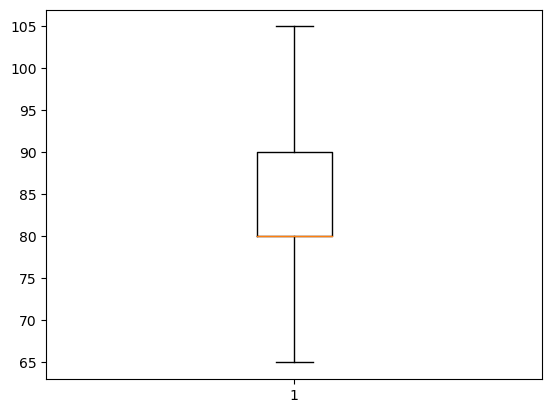

In [18]:
plt.boxplot(x=data['ap_lo'])


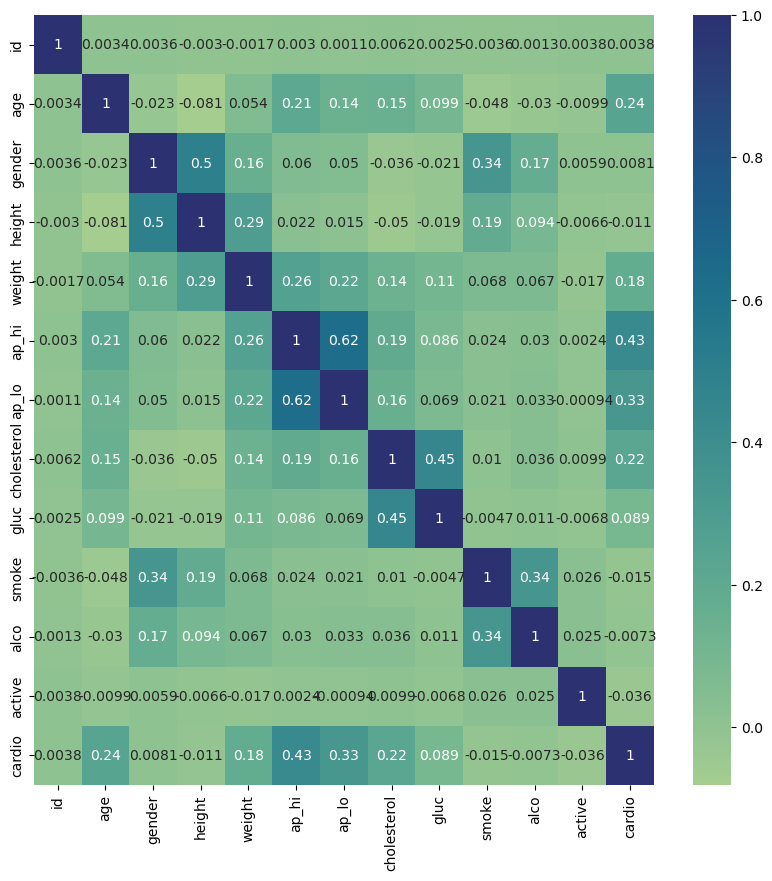

In [19]:

data_corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap="crest")
plt.show()

In [20]:
features = ['age', 'weight', 'cholesterol', 'gluc', 'ap_hi', 'ap_lo', 'smoke', 'active' ]
target_var = ['cardio']

In [21]:
X = data[features]
y = data[target_var]


In [22]:
# data = pd.concat([X, y], axis=1)

# sns.pairplot(data, hue='cardio', corner=True)
# plt.show()

### Model Training

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse

##### Splitting data

In [24]:

X_train ,X_test , y_train , y_test = train_test_split(X, y , test_size=0.2)


#### Logistic Regression model 

In [25]:
Regressor = LogisticRegression()
Regressor.fit(X_train,y_train)


/home/supriya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/supriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
from sklearn.metrics import recall_score

from sklearn.metrics import f1_score

In [27]:
y_pred = Regressor.predict(X_test)
print(y_pred)
print('Recall score : ', recall_score(y_test, y_pred, average=None))
f1_score(y_test, y_pred)


# print(y_pred[1], y_test[1])

[0 1 1 ... 1 0 0]
Recall score :  [0.74255717 0.67560664]


0.7002500367701132

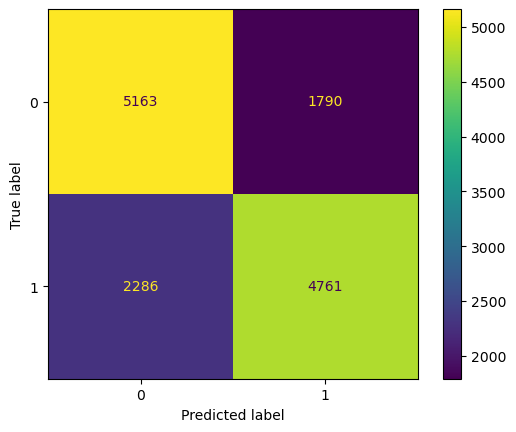

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=Regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Regressor.classes_)
disp.plot()
plt.show()

In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [30]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)


0.996011964107677

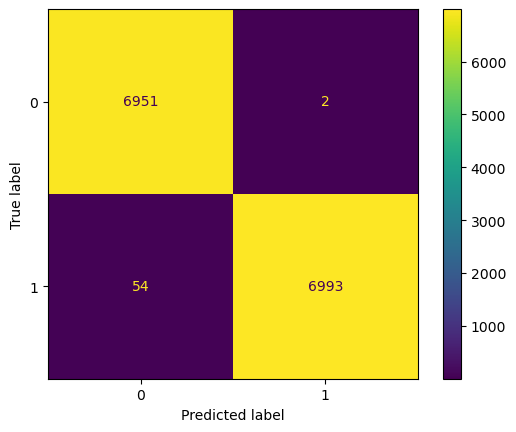

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()